<a href="https://colab.research.google.com/github/moomonkey/tf_lab/blob/master/Fashion_mnist_bas3D_matrix4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Denna kod använder keras och tf, med Fashion-mnist databas

# Denna kod är baserad på dokumentation i Francois Chollets "Deep learning with Python", tensorflow API, docs, och tutorials: https://www.tensorflow.org/tutorials/keras/basic_classification, Margaret Maynard-Reids https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a, och Keras dokumentation, https://keras.io/examples/mnist_cnn/. Visualisering är inkluderad för att verifiera koden.

# Imports

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Importera dataset Fashion-mnist, vilket har 10 kategorier, i träningsdata, träningslabel för att träna modellen, testdata och testlabels för att testa modellen

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Se träningsdata

In [20]:
print("Träningsbilder: ", train_img.shape, "Träningsetiketter: ", train_labels.shape) #består av 60000 exempel i 28*28 pixelformat

Träningsbilder:  (60000, 28, 28) Träningsetiketter:  (60000,)


# Se testdatan

In [21]:
print("Testbilder: ", test_img.shape, "Testetiketter: ", test_labels.shape) #består av 10000 exempel i 28*28 format

Testbilder:  (10000, 28, 28) Testetiketter:  (10000,)


# Se första bilden i datasetet och pixelvärdet

AxesImage(54,36;267.84x217.44) <matplotlib.colorbar.Colorbar object at 0x7fa2ece2e438>


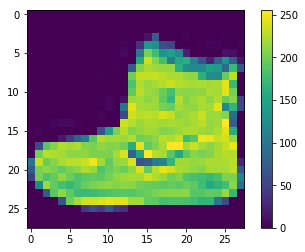

In [22]:
print(plt.imshow(train_img[0]), plt.colorbar())

# Skapa etiketter för datasetets kategorier

In [0]:
fashion_cat = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Boot']

#Förbered datan. Normalize data

In [38]:
train_img = train_img.astype('float32') / 255 #Normalisera pixeldimension från 0-255 till 0-1
test_img = test_img.astype('float32') / 255
import pandas as pd
train_img = train_img.reshape(-1,28,28,1)
print(train_img.shape)
test_img = test_img.reshape(-1,28,28,1)
print(test_img.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Förbered encode labels

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [40]:
print(train_labels.shape) #se output
print(test_labels.shape)

(60000, 10)
(10000, 10)


# Definiera lager i modell

In [44]:
model = tf.keras.Sequential()
#Definiera input shape i första lagret
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', strides=(1,1), activation='relu', input_shape=(28, 28, 1))) #conv2D spatial conv av bilder
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))#storlek på poolingfönster
model.add(tf.keras.layers.Dropout(0.25)) #drop-out i varje lager för att motverka loss
#lager 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', strides=(1,1), activation='relu')) #formen på slides blir (1,28,28,10)
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))
#lager 3
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', strides=(1,1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))
#lager 4
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu')) #Dense med 100 neurons
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(100, activation='relu')) #Dense med 100 neurons
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation= 'softmax'))#probabilty score (10 neurons ut) till kategorierna

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 32)         

# Kompilera modellen

In [0]:

model.compile(optimizer='Adam',#(men Adam optimizer fungerar bättre än sgd (Standard stochastic gradient descent and momentum optimizer)
              loss='categorical_crossentropy', #loss funktion
              metrics=['accuracy'])

# Training model med epoch (iteration)

In [47]:
model.fit(train_img, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 52s 871us/sample - loss: 0.8005 - acc: 0.6896
Epoch 2/20
60000/60000 [==============================] - 52s 866us/sample - loss: 0.5349 - acc: 0.8016
Epoch 3/20
60000/60000 [==============================] - 53s 876us/sample - loss: 0.4693 - acc: 0.8269
Epoch 4/20
60000/60000 [==============================] - 53s 880us/sample - loss: 0.4325 - acc: 0.8421
Epoch 5/20
60000/60000 [==============================] - 53s 876us/sample - loss: 0.4072 - acc: 0.8518
Epoch 6/20
60000/60000 [==============================] - 52s 869us/sample - loss: 0.3907 - acc: 0.8562
Epoch 7/20
60000/60000 [==============================] - 52s 865us/sample - loss: 0.3783 - acc: 0.8633
Epoch 8/20
60000/60000 [==============================] - 51s 854us/sample - loss: 0.3625 - acc: 0.8670
Epoch 9/20
60000/60000 [==============================] - 51s 855us/sample - loss: 0.3570 - acc: 0.8692
Epoch 10/20
60000/60000 [==============================] - 51s 8

# Använd test data på modellen för att jämföra med träningsdata

In [48]:
model.fit(test_img, test_labels, epochs=20)

Epoch 1/20
10000/10000 [==============================] - 8s 844us/sample - loss: 0.3596 - acc: 0.8747
Epoch 2/20
10000/10000 [==============================] - 8s 845us/sample - loss: 0.3356 - acc: 0.8781
Epoch 3/20
10000/10000 [==============================] - 8s 848us/sample - loss: 0.3376 - acc: 0.8764
Epoch 4/20
10000/10000 [==============================] - 9s 850us/sample - loss: 0.3300 - acc: 0.8802
Epoch 5/20
10000/10000 [==============================] - 8s 843us/sample - loss: 0.3216 - acc: 0.8834
Epoch 6/20
10000/10000 [==============================] - 8s 846us/sample - loss: 0.3271 - acc: 0.8822
Epoch 7/20
10000/10000 [==============================] - 8s 845us/sample - loss: 0.3170 - acc: 0.8833
Epoch 8/20
10000/10000 [==============================] - 8s 850us/sample - loss: 0.3140 - acc: 0.8831
Epoch 9/20
10000/10000 [==============================] - 8s 848us/sample - loss: 0.3073 - acc: 0.8897
Epoch 10/20
10000/10000 [==============================] - 9s 852us/sampl

#Evaluera och jämför training data med test data

In [49]:
train_loss, train_acc = model.evaluate(train_img, train_labels)
test_loss, test_acc = model.evaluate(test_img, test_labels)
print('\nTrain noggrannhet: ', int(train_acc*100),'%', '\nTrain loss', train_loss)
print('\nTest noggrannhet: ', int(test_acc*100),'%', '\nTest loss', test_loss)

10000/10000 [==============================] - 3s 261us/sample - loss: 0.1840 - acc: 0.9286

Train noggrannhet:  91 % 
Train loss 0.23016058892210325

Test noggrannhet:  92 % 
Test loss 0.18399130108356476


# Resultat av evaluering: Bäst testresultat av klassificering

In [31]:
# Evaluate the model on test set
score = model.evaluate(test_img, test_labels, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.753
